[Data_School](https://www.youtube.com/watch?v=3ZWuPVWq7p4&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=6)

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

data = pd.read_csv('data/Advertising.csv', index_col=0)
print(data.head())
print(data.shape)

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


/Users/sungchul/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


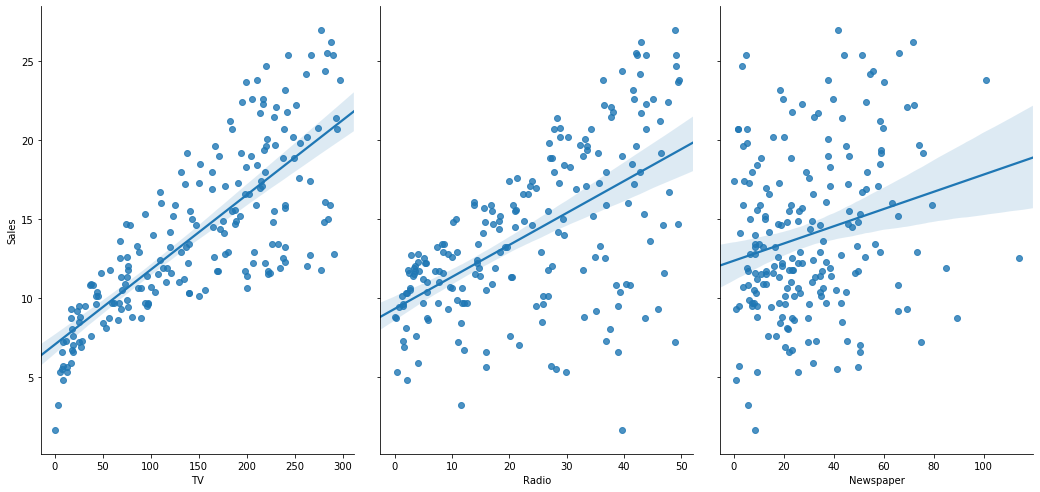

In [3]:
import seaborn as sns

sns.pairplot(data, 
             x_vars=['TV','Radio','Newspaper'], 
             y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [4]:
from sklearn.model_selection import train_test_split

feature_cols = ['TV', 'Radio', 'Newspaper'] 
X = data[feature_cols]
y = data['Sales']
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(200, 3)
(200,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(150, 3)
(150,)
(50, 3)
(50,)


In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_test_pred = reg.predict(X_test)

print(reg.intercept_)
print(reg.coef_)
print()

feature_cols = ['TV', 'Radio', 'Newspaper'] 
print(list(zip(feature_cols, reg.coef_)))
print()

2.8769666223179318
[0.04656457 0.17915812 0.00345046]

[('TV', 0.04656456787415028), ('Radio', 0.17915812245088836), ('Newspaper', 0.0034504647111804412)]



$$
\begin{array}{lll}
\mbox{MAE}&&\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|\\
\mbox{MSE}&&\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2\\
\mbox{RMSE}&&\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}
\end{array}
$$

In [6]:
import numpy as np
from sklearn import metrics

print(metrics.mean_absolute_error(y_test, y_test_pred))
print(metrics.mean_squared_error(y_test, y_test_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

1.0668917082595213
1.9730456202283384
1.4046514230328955


## Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the RMSE!

In [7]:
import numpy as np

score = []

feature_cols = ['TV', 'Radio', 'Newspaper']
for feature_drop in feature_cols:
    feature_cols = ['TV', 'Radio', 'Newspaper']     
    feature_cols.remove(feature_drop)

    X_train_new = X_train[feature_cols]
    X_test_new = X_test[feature_cols]
    
    reg = LinearRegression()
    reg.fit(X_train_new, y_train)
    y_test_pred = reg.predict(X_test_new)
    
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    score.append(rmse)
    
feature_cols = ['TV', 'Radio', 'Newspaper']
print(feature_cols) 
print(score)

['TV', 'Radio', 'Newspaper']
[3.748697497467727, 3.352056334433862, 1.3879034699382888]


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

## Resources

Linear regression:

- [Longer notebook on linear regression](https://github.com/justmarkham/DAT5/blob/master/notebooks/09_linear_regression.ipynb) by me
- Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) and [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) by Hastie and Tibshirani (Stanford)
- [Quick reference guide to applying and interpreting linear regression](http://www.dataschool.io/applying-and-interpreting-linear-regression/) by me
- [Introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) by Robert Nau (Duke)

Pandas:

- [pandas Q&A video series](https://www.dataschool.io/easier-data-analysis-with-pandas/) by me
- [Three-part pandas tutorial](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) by Greg Reda
- [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) and [read_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html) documentation

Seaborn:

- [Official seaborn tutorial](http://seaborn.pydata.org/tutorial.html)
- [Example gallery](http://seaborn.pydata.org/examples/index.html)